In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

# DATA PREPARATION

### Importing and Join movie data from 2005 to 2015

In [4]:
year = 2005
df = pd.read_csv(f'movie_data{year}.csv')

for year in range(2006,2016):
    temp = pd.read_csv(f'movie_data{year}.csv')
    df = df.append(temp, sort=False)

df.head(20)

,original_title,genres,release_date,runtime,budget,revenue,popularity,vote_average,vote_count
0,The Naughty Show: Bad Girls of Comedy,Comedy,2005-01-01,149.0,0,0,0.000,0.0,0
1,The Salesmen,NaN,2005-04-01,17.0,0,0,0.600,0.0,0
2,Charlie the Unicorn,Animation Comedy,2005-11-26,3.0,0,0,0.600,0.0,0
3,The Thursday Club,Documentary,2005-06-01,61.0,0,0,0.600,0.0,0
4,Command Z,NaN,2005-01-01,5.0,0,0,0.600,0.0,0
5,Music Palace,Documentary,2005-03-01,9.0,0,0,0.600,0.0,0
6,Possessed: The Quintessential Film Noir,Documentary,2005-06-14,10.0,0,0,0.600,0.0,0
7,Queen of Cactus Cove,Comedy,2005-12-11,22.0,0,0,0.600,0.0,0
8,Last Laugh '05,NaN,2005-12-11,105.0,0,0,0.600,0.0,0
9,Patient J (Joker),NaN,2005-10-10,34.0,5000,0,2.766,0.0,0


In [5]:
#from the table above, we realised that there are a lot of movies without information on budget and revenue

### Data Cleaning

In [6]:
#remove movies without information on budget and revenue
df = df[df.revenue != 0]
df = df[df.budget != 0]
df.head()

,original_title,genres,release_date,runtime,budget,revenue,popularity,vote_average,vote_count
1549,Legends: The Five Greatest Fighters from Pride...,Action Documentary,2005-06-16,140.0,100000,7000000,0.878,0.0,0
1593,My Brother's War,War History Drama Romance,2005-09-01,115.0,40,300,0.600,0.0,0
1692,Hank Williams First Nation,Drama Comedy,2005-02-04,92.0,300000,166000,0.600,0.0,0
2145,One More Round,Comedy,2005-02-25,90.0,350000,4984,1.793,6.5,1
2168,Anonymous Celebrities: Animatic,Comedy Drama Music Science Fiction Thriller,2005-10-18,99.0,200,10,1.181,10.0,1


# Import and Clean data on Nominated Films

### Golden Globe Award

In [7]:
#importing golden globes award data , extract only 2005 to 2015
goldenData = pd.read_csv('GoldenGlobe.csv')
goldenData.info()
goldenData = goldenData[goldenData.year_film >= 2005]
goldenData = goldenData[goldenData.year_film <= 2015]
goldenData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_film   7991 non-null   int64 
 1   year_award  7991 non-null   int64 
 2   ceremony    7991 non-null   int64 
 3   category    7991 non-null   object
 4   nominee     7991 non-null   object
 5   film        6191 non-null   object
 6   win         7991 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


,year_film,year_award,ceremony,category,nominee,film,win
6096,2005,2006,63,Best Motion Picture - Drama,Brokeback Mountain,NaN,True
6097,2005,2006,63,Best Motion Picture - Drama,Match Point,NaN,False
6098,2005,2006,63,Best Motion Picture - Drama,"Constant Gardener, The",NaN,False
6099,2005,2006,63,Best Motion Picture - Drama,"Good Night, and Good Luck",NaN,False
6100,2005,2006,63,Best Motion Picture - Drama,A History of Violence,NaN,False
...,...,...,...,...,...,...,...
7479,2015,2016,73,Best Performance by an Actor in a Supporting R...,Tobias Menzies,Outlander,False
7480,2015,2016,73,Best Performance by an Actor in a Supporting R...,Alan Cumming,NaN,False
7481,2015,2016,73,Best Performance by an Actor in a Supporting R...,Damian Lewis,Wolf Hall,False
7482,2015,2016,73,Best Performance by an Actor in a Supporting R...,Ben Mendelsohn,Bloodline,False


In [8]:
#Find indexes of those columns which contain the words : Actor/Actress
list1= goldenData.index[goldenData['category'].str.contains('Actor')].tolist()
list1.extend(goldenData.index[goldenData['category'].str.contains('Actress')].tolist())
#Drop these rows which has the words: Actor/Actress
for item in list1:
    goldenData1=goldenData.drop(index= list1).reset_index(drop=True)
#Drop columns that are no longer needed
goldenData1=goldenData1.drop(goldenData1.columns[[0, 1,2,3,5,6]], axis=1)
goldenData1
#Rename the columns to Name
goldenData2 = goldenData1.rename(columns={'nominee':'Name'})
goldenData2 

,Name
0,Brokeback Mountain
1,Match Point
2,"Constant Gardener, The"
3,"Good Night, and Good Luck"
4,A History of Violence
...,...
606,American Crime
607,American Horror Story: Hotel
608,Fargo
609,Flesh & Bone


### Oscars

In [9]:
oscarsData = pd.read_csv('Oscars.csv')
oscarsData.info()
#Find indexes with have '/' in Year if not cannot convert to int64 dtype
list1=oscarsData.index[oscarsData['Year'].str.contains('/')].tolist()
#Drop these rows
for item in list1:
    oscarsData1=oscarsData.drop(index= list1).reset_index(drop=True)
#Convert to int dtype
oscarsData1['Year'].astype(int)
oscarsData1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      9964 non-null   object 
 1   Ceremony  9964 non-null   int64  
 2   Award     9964 non-null   object 
 3   Winner    2321 non-null   float64
 4   Name      9964 non-null   object 
 5   Film      9631 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 467.2+ KB


,Year,Ceremony,Award,Winner,Name,Film
0,1934,7,Actor,1.0,Clark Gable,It Happened One Night
1,1934,7,Actor,NaN,Frank Morgan,The Affairs of Cellini
2,1934,7,Actor,NaN,William Powell,The Thin Man
3,1934,7,Actress,1.0,Claudette Colbert,It Happened One Night
4,1934,7,Actress,NaN,Bette Davis,Of Human Bondage
...,...,...,...,...,...,...
9693,2015,88,Writing (Original Screenplay),1.0,Spotlight,Written by Josh Singer & Tom McCarthy
9694,2015,88,Writing (Original Screenplay),NaN,Straight Outta Compton,Screenplay by Jonathan Herman and Andrea Berlo...
9695,2015,88,Jean Hersholt Humanitarian Award,1.0,Debbie Reynolds,NaN
9696,2015,88,Honorary Award,1.0,Spike Lee,NaN


In [10]:
#Extract movies that are filmed from 2005-2015 that are nominated for the award
list2=oscarsData1.index[oscarsData1['Year'] =='2005'].tolist()
oscarsData1.drop(oscarsData1.index[0:8357],0,inplace=True)
oscarsData1

,Year,Ceremony,Award,Winner,Name,Film
8357,2005,78,Actor in a Leading Role,1.0,Philip Seymour Hoffman,Capote
8358,2005,78,Actor in a Leading Role,NaN,Terrence Howard,Hustle & Flow
8359,2005,78,Actor in a Leading Role,NaN,Heath Ledger,Brokeback Mountain
8360,2005,78,Actor in a Leading Role,NaN,Joaquin Phoenix,Walk the Line
8361,2005,78,Actor in a Leading Role,NaN,David Strathairn,"Good Night, and Good Luck."
...,...,...,...,...,...,...
9693,2015,88,Writing (Original Screenplay),1.0,Spotlight,Written by Josh Singer & Tom McCarthy
9694,2015,88,Writing (Original Screenplay),NaN,Straight Outta Compton,Screenplay by Jonathan Herman and Andrea Berlo...
9695,2015,88,Jean Hersholt Humanitarian Award,1.0,Debbie Reynolds,NaN
9696,2015,88,Honorary Award,1.0,Spike Lee,NaN


In [11]:
#Find indexes of those columns which contain the word : Actor
list1=oscarsData1.index[oscarsData1['Award'].str.contains('Actor')].tolist()
list1.extend(oscarsData1.index[oscarsData1['Award'].str.contains('Actress')].tolist())
for item in list1:
    oscarsData1=oscarsData1.drop(index=item)
oscarsData1=oscarsData1.reset_index(drop=True)
oscarsData1

,Year,Ceremony,Award,Winner,Name,Film
0,2005,78,Animated Feature Film,NaN,Howl's Moving Castle,Hayao Miyazaki
1,2005,78,Animated Feature Film,NaN,Tim Burton's Corpse Bride,Mike Johnson and Tim Burton
2,2005,78,Animated Feature Film,1.0,Wallace & Gromit in The Curse of the Were-Rabbit,Nick Park and Steve Box
3,2005,78,Art Direction,NaN,"Good Night, and Good Luck.",Art Direction: Jim Bissell; Set Decoration: Ja...
4,2005,78,Art Direction,NaN,Harry Potter and the Goblet of Fire,Art Direction: Stuart Craig; Set Decoration: S...
...,...,...,...,...,...,...
1116,2015,88,Writing (Original Screenplay),1.0,Spotlight,Written by Josh Singer & Tom McCarthy
1117,2015,88,Writing (Original Screenplay),NaN,Straight Outta Compton,Screenplay by Jonathan Herman and Andrea Berlo...
1118,2015,88,Jean Hersholt Humanitarian Award,1.0,Debbie Reynolds,NaN
1119,2015,88,Honorary Award,1.0,Spike Lee,NaN


In [12]:
# Drop columns that are no longer needed
oscarsData1=oscarsData1.drop(oscarsData1.columns[[0,1,2,3,5]], axis=1)
oscarsData1

,Name
0,Howl's Moving Castle
1,Tim Burton's Corpse Bride
2,Wallace & Gromit in The Curse of the Were-Rabbit
3,"Good Night, and Good Luck."
4,Harry Potter and the Goblet of Fire
...,...
1116,Spotlight
1117,Straight Outta Compton
1118,Debbie Reynolds
1119,Spike Lee


# Joining of Data on nominated films for Golden Globe and Oscars

In [13]:
#Join the 2 dataframes together
jointdf=pd.concat([goldenData2, oscarsData1])
#Re-index the joint dataframe
jointdf= jointdf.reset_index(drop=True)
jointdf

,Name
0,Brokeback Mountain
1,Match Point
2,"Constant Gardener, The"
3,"Good Night, and Good Luck"
4,A History of Violence
...,...
1727,Spotlight
1728,Straight Outta Compton
1729,Debbie Reynolds
1730,Spike Lee


# Create Boolean Column for Nominated Films

In [14]:
df['nominated'] = False
df = df.reset_index(drop=True)

In [15]:
namelist = []
for name in jointdf['Name']:
    namelist.append(name)
# print(namelist)

In [16]:
#include boolean column for nominated films
indexlist = []
for name in namelist:
    indexlist += df.loc[df['original_title'] == name].index.tolist()
for i in indexlist:
    df.at[i,'nominated']= True
df

,original_title,genres,release_date,runtime,budget,revenue,popularity,vote_average,vote_count,nominated
0,Legends: The Five Greatest Fighters from Pride...,Action Documentary,2005-06-16,140.0,100000,7000000,0.878,0.0,0,False
1,My Brother's War,War History Drama Romance,2005-09-01,115.0,40,300,0.600,0.0,0,False
2,Hank Williams First Nation,Drama Comedy,2005-02-04,92.0,300000,166000,0.600,0.0,0,False
3,One More Round,Comedy,2005-02-25,90.0,350000,4984,1.793,6.5,1,False
4,Anonymous Celebrities: Animatic,Comedy Drama Music Science Fiction Thriller,2005-10-18,99.0,200,10,1.181,10.0,1,False
...,...,...,...,...,...,...,...,...,...,...
2266,Star Wars: The Force Awakens,Action Adventure Science Fiction Fantasy,2015-12-15,136.0,245000000,2068223624,56.282,7.4,15637,True
2267,Inside Out,Animation Family Adventure Drama Comedy,2015-06-09,95.0,175000000,857611174,59.480,7.9,16295,True
2268,Jurassic World,Action Adventure Science Fiction Thriller,2015-06-06,124.0,150000000,1671713208,83.357,6.6,16650,False
2269,Avengers: Age of Ultron,Action Adventure Science Fiction,2015-04-22,141.0,250000000,1405403694,151.637,7.3,17607,False


# Exploratory Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  2271 non-null   object 
 1   genres          2254 non-null   object 
 2   release_date    2271 non-null   object 
 3   runtime         2270 non-null   float64
 4   budget          2271 non-null   int64  
 5   revenue         2271 non-null   int64  
 6   popularity      2271 non-null   float64
 7   vote_average    2271 non-null   float64
 8   vote_count      2271 non-null   int64  
 9   nominated       2271 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 162.0+ KB


### Ensuring there are no NULL Values

In [18]:
df.isnull().sum()
#since we identified some null value, we place it with 

original_title     0
genres            17
release_date       0
runtime            1
budget             0
revenue            0
popularity         0
vote_average       0
vote_count         0
nominated          0
dtype: int64

In [19]:
df["genres"].fillna(value = "NoGenre", inplace = True)
df["runtime"].fillna(value = 0, inplace = True)

### Uni-variate Analysis

In [20]:
numDF = pd.DataFrame(df[["runtime", "budget", "revenue", "popularity", "vote_average", "vote_count"]])
numDF.describe()

,runtime,budget,revenue,popularity,vote_average,vote_count
count,2271.000000,2.271000e+03,2.271000e+03,2271.000000,2271.000000,2271.000000
mean,104.379568,3.789275e+07,1.080603e+08,20.974608,6.190137,2123.276530
std,21.797070,4.734723e+07,1.977329e+08,21.898272,1.228318,3173.159105
min,0.000000,1.000000e+00,-1.200000e+01,0.600000,0.000000,0.000000
25%,93.000000,7.000000e+06,4.608626e+06,10.973000,5.800000,303.000000
50%,103.000000,2.000000e+07,3.635135e+07,14.523000,6.300000,959.000000
75%,115.000000,5.000000e+07,1.169904e+08,23.800000,6.800000,2496.500000
max,339.000000,3.800000e+08,2.787965e+09,558.563000,10.000000,28730.000000


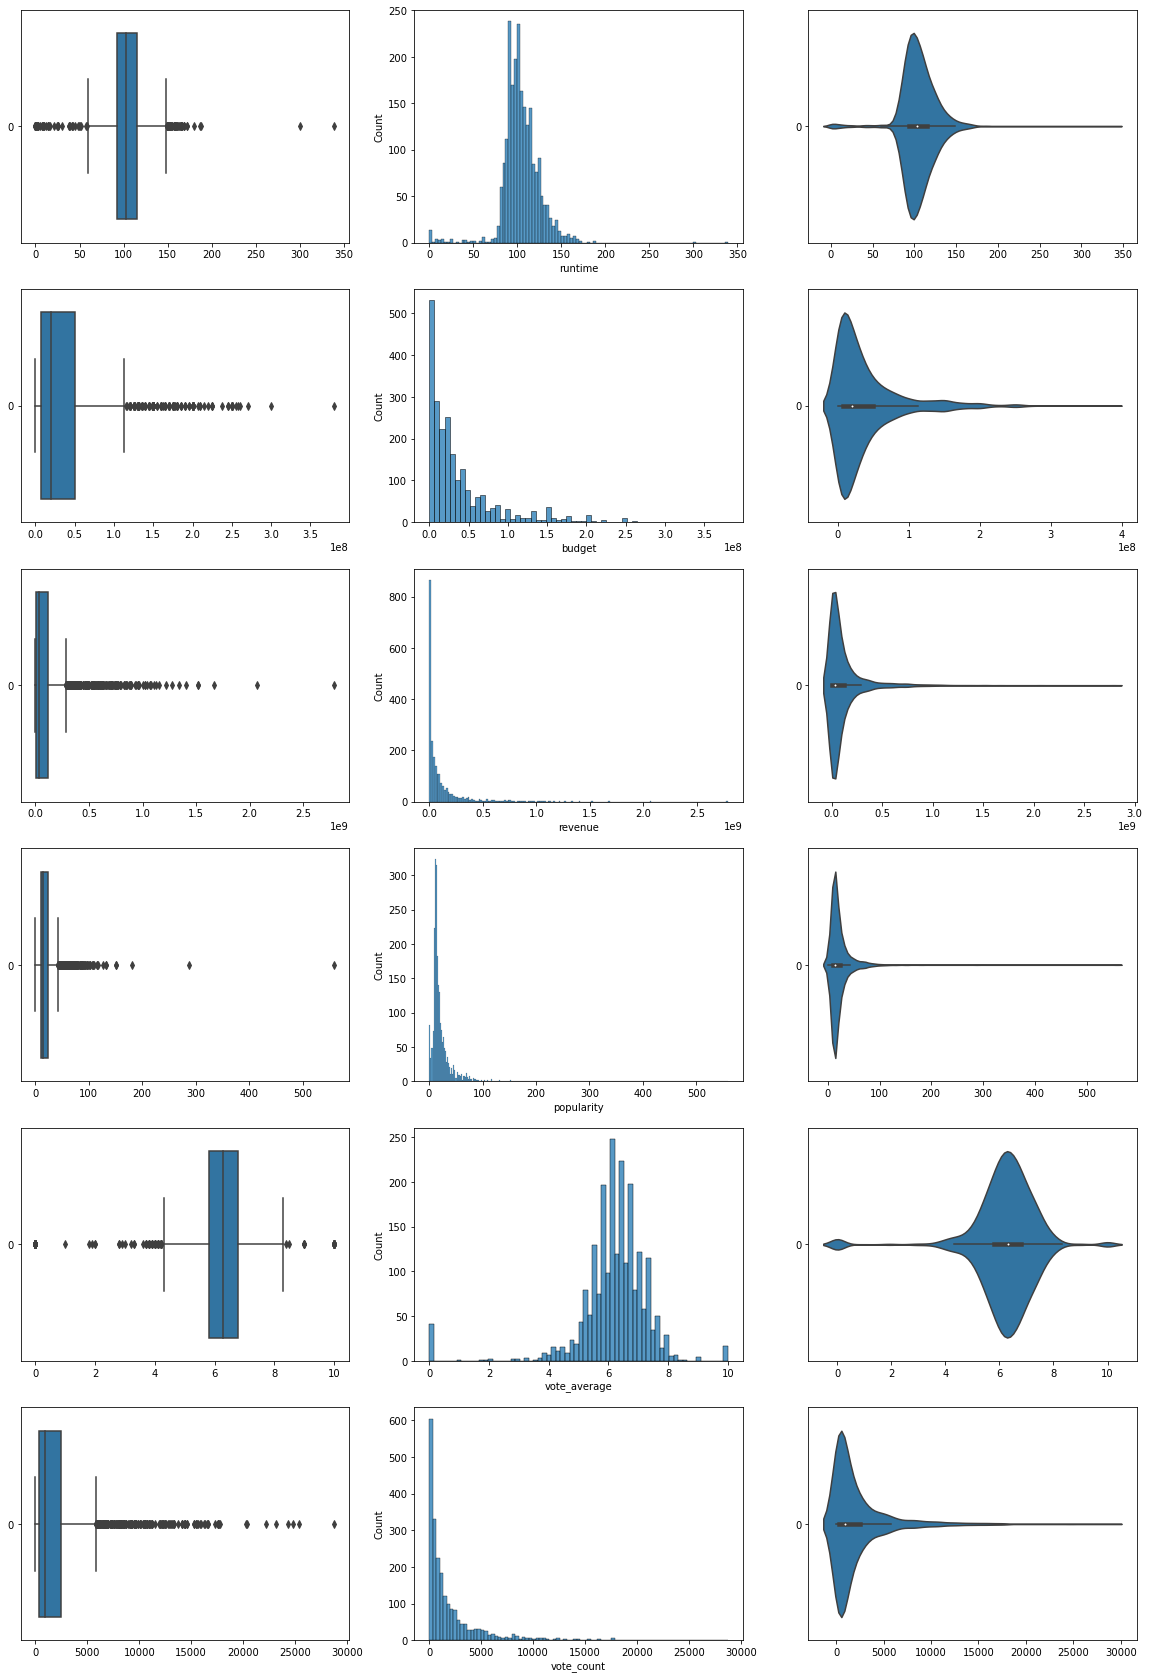

In [21]:
# to visualise the data above, we plot them graphically
f, axes = plt.subplots(6, 3, figsize=(20, 30))
count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], kde = True, orient = "h", ax = axes[count,2])
    count += 1

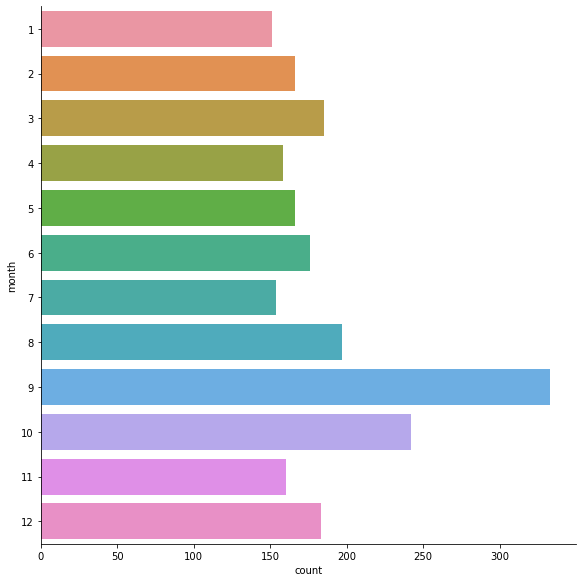

In [22]:
# we want to see the distribution of movies according to month
df['release_date'] = pd.to_datetime(df['release_date'])
dateDF = pd.DataFrame(df['release_date'])
dateDF['month'] = dateDF['release_date'].dt.month
sb.catplot(y = "month", data = dateDF, kind = "count", height = 8)

In [23]:
df['genres'].value_counts()

Drama                                                   160
Comedy                                                  137
Drama Romance                                            71
Comedy Romance                                           65
Comedy Drama                                             63
                                                       ... 
Action Adventure Animation Science Fiction Thriller       1
Science Fiction Mystery Thriller                          1
Action Drama Mystery Thriller Crime                       1
Action Documentary                                        1
Adventure Action Animation                                1
Name: genres, Length: 731, dtype: int64

<AxesSubplot:>

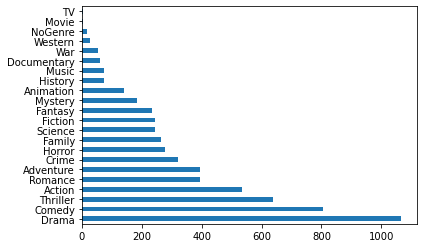

In [24]:
df['genres'].str.split(expand=True).stack().value_counts().plot(kind = 'barh')
#using genre for our model seems unfeasible as of now.

### Multi-variate Analysis

               runtime    budget   revenue  popularity  vote_average  \
runtime       1.000000  0.348674  0.289045    0.214265      0.347127   
budget        0.348674  1.000000  0.776503    0.492365      0.158617   
revenue       0.289045  0.776503  1.000000    0.564838      0.211481   
popularity    0.214265  0.492365  0.564838    1.000000      0.177285   
vote_average  0.347127  0.158617  0.211481    0.177285      1.000000   
vote_count    0.361660  0.649663  0.787190    0.575226      0.336038   

              vote_count  
runtime         0.361660  
budget          0.649663  
revenue         0.787190  
popularity      0.575226  
vote_average    0.336038  
vote_count      1.000000  


<AxesSubplot:>

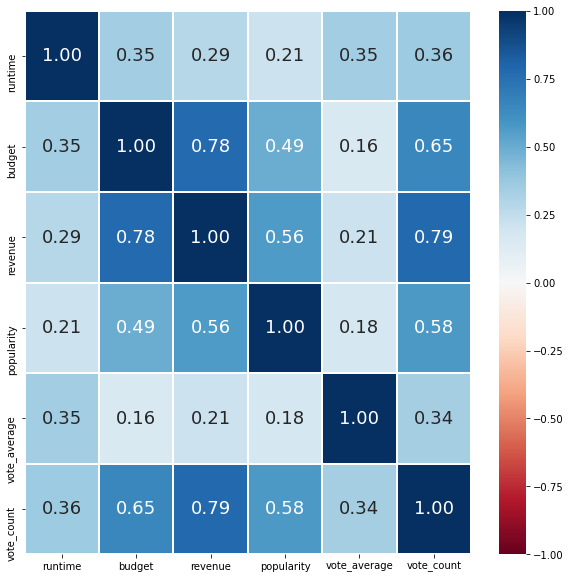

In [25]:
print(numDF.corr())
f = plt.figure(figsize=(10, 10))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

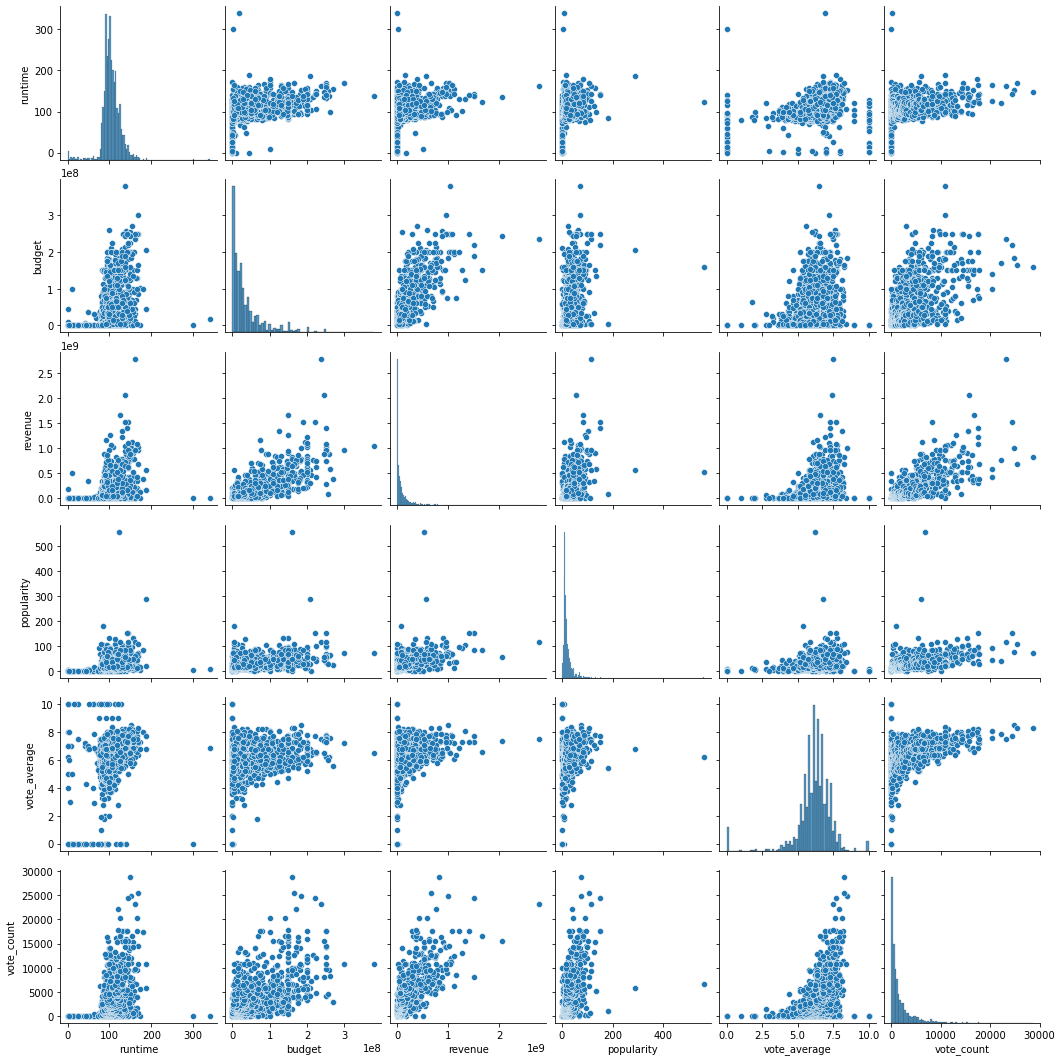

In [26]:
sb.pairplot(data = numDF)

<AxesSubplot:xlabel='revenue', ylabel='month'>

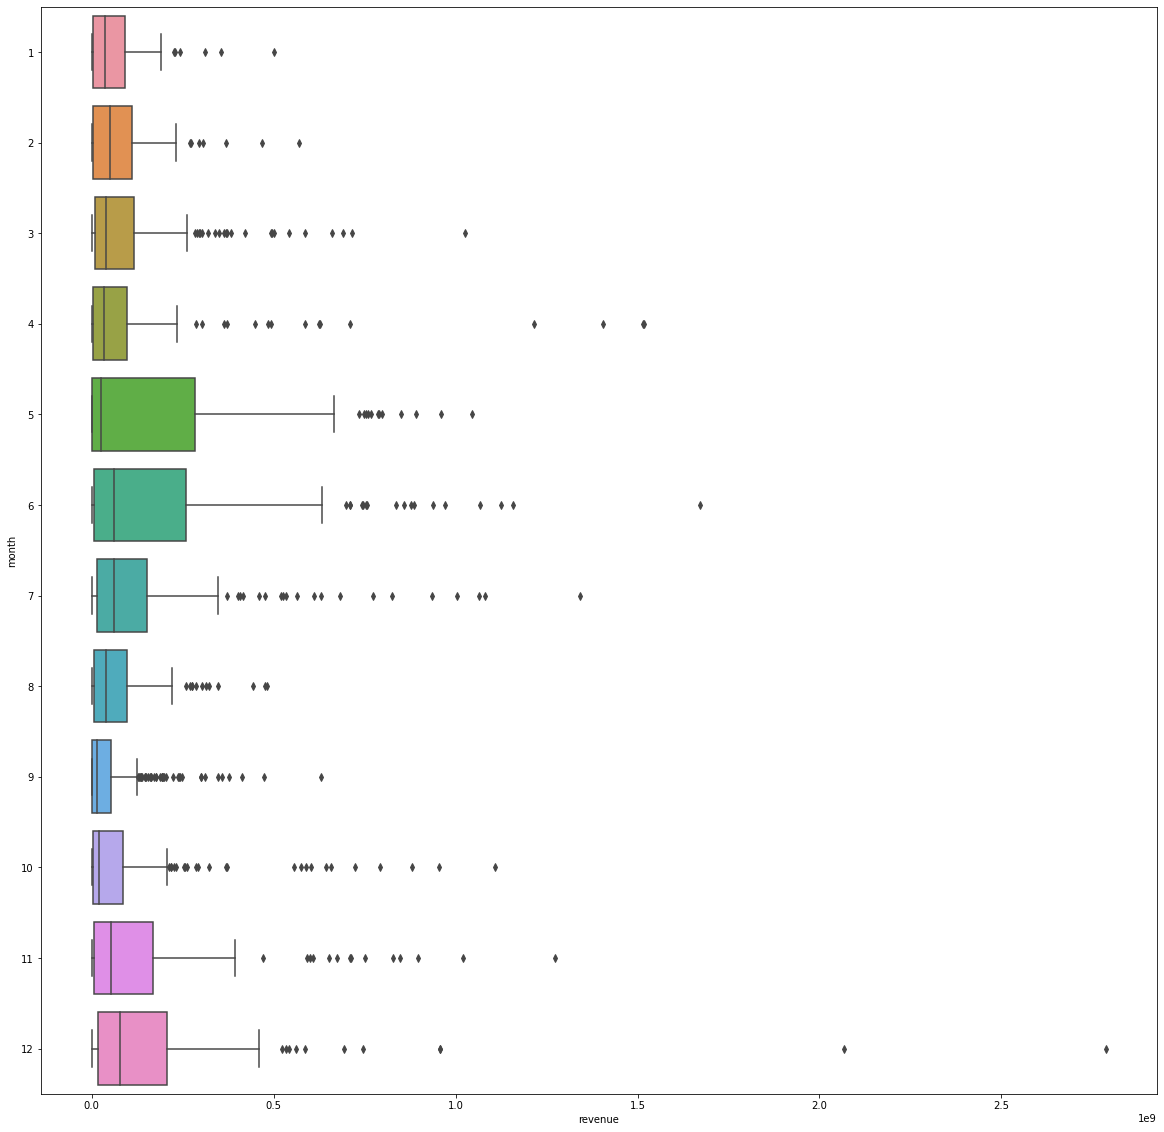

In [27]:
f = plt.figure(figsize=(20, 20))
sb.boxplot(x = numDF["revenue"], y = dateDF["month"], orient = "h",)

<AxesSubplot:xlabel='runtime', ylabel='nominated'>

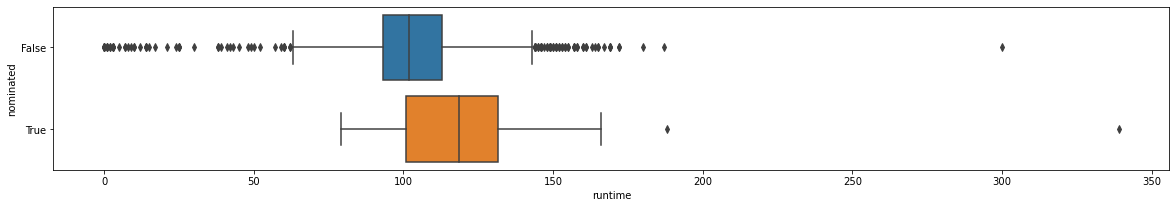

In [28]:
f = plt.figure(figsize=(20, 3))
sb.boxplot(x = df["runtime"], y = df['nominated'], orient = "h",)

In [29]:
df['nominated'].value_counts()

False    2147
True      124
Name: nominated, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  2271 non-null   object        
 1   genres          2271 non-null   object        
 2   release_date    2271 non-null   datetime64[ns]
 3   runtime         2271 non-null   float64       
 4   budget          2271 non-null   int64         
 5   revenue         2271 non-null   int64         
 6   popularity      2271 non-null   float64       
 7   vote_average    2271 non-null   float64       
 8   vote_count      2271 non-null   int64         
 9   nominated       2271 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 162.0+ KB


# Nominated vs Revenue

<AxesSubplot:xlabel='revenue', ylabel='nominated'>

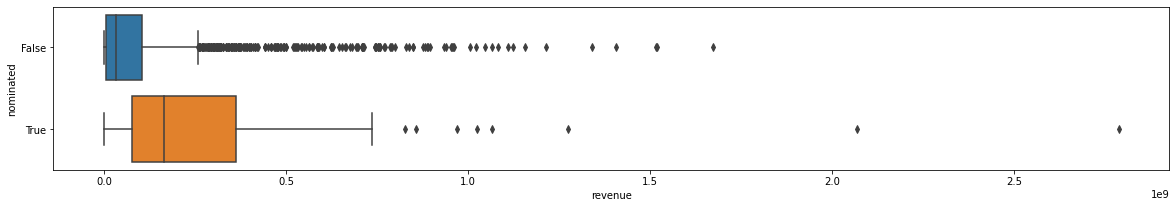

In [31]:
f = plt.figure(figsize=(20, 3))
sb.boxplot(x = df["revenue"], y = df['nominated'], orient = "h")

<AxesSubplot:xlabel='revenue', ylabel='nominated'>

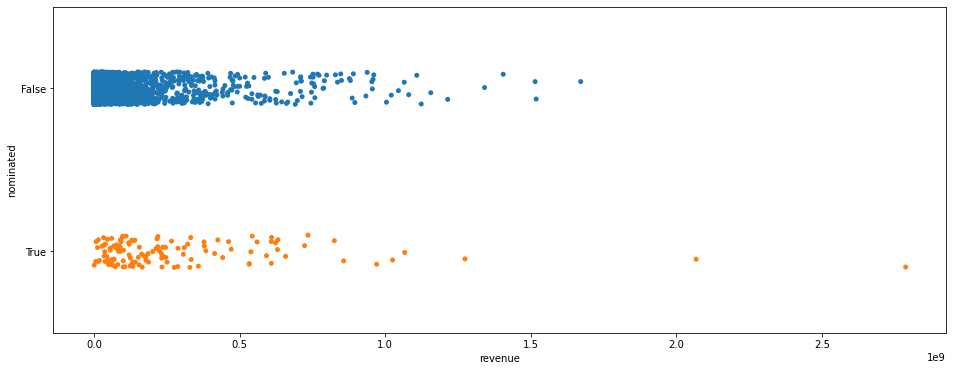

In [32]:
f = plt.figure(figsize=(16, 6))
sb.stripplot(x = 'revenue', y = 'nominated', data = df,orient='h')

There is 2 distinct groups of data. Hence, using revenue as a variable is suitable for classification of nominated films.  Films with a higher revenue also have a higher chance of being nominated.

# Nominated vs Budget

<AxesSubplot:xlabel='budget', ylabel='nominated'>

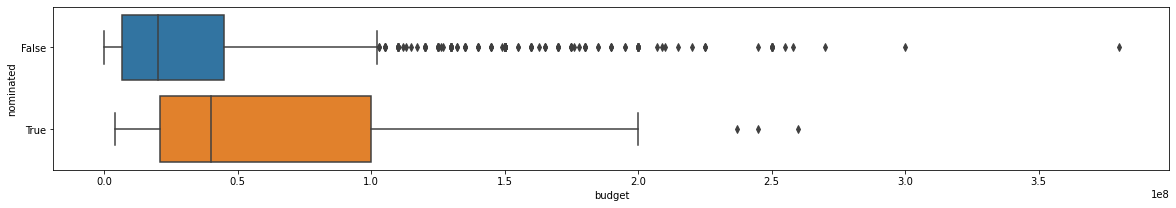

In [33]:
f = plt.figure(figsize=(20, 3))
sb.boxplot(x = df["budget"], y = df['nominated'], orient = "h")

<AxesSubplot:xlabel='budget', ylabel='nominated'>

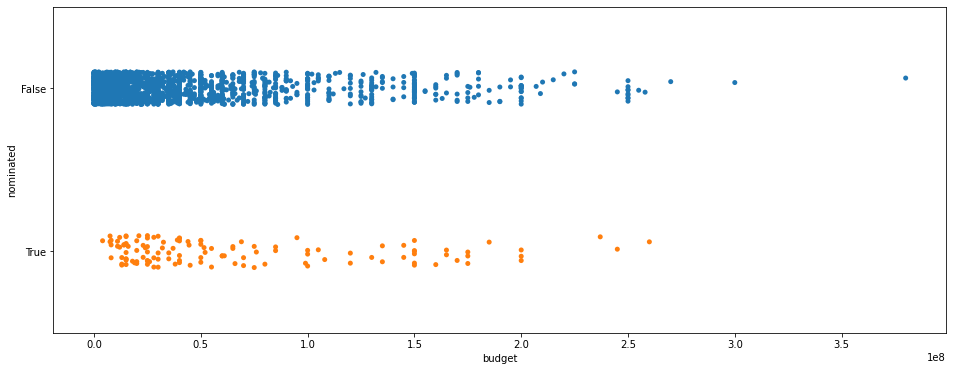

In [34]:
f = plt.figure(figsize=(16, 6))
sb.stripplot(x = 'budget', y = 'nominated', data = df,orient='h')

There is 2 distinct groups of data. Hence, using budget as a variable is suitable for classification of nominated films.  Films with a higher budget also have a higher chance of being nominated.

# Nominated vs Runtime

<AxesSubplot:xlabel='runtime', ylabel='nominated'>

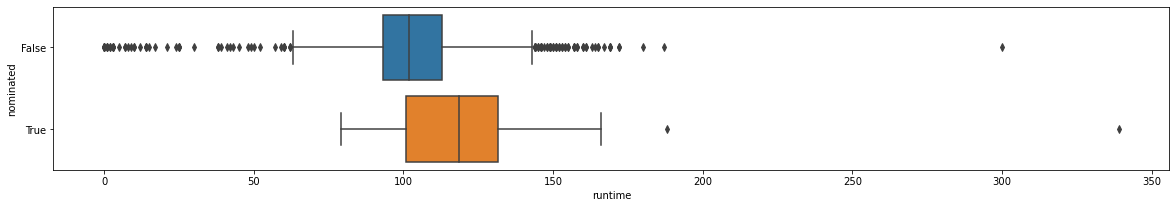

In [35]:
f = plt.figure(figsize=(20, 3))
sb.boxplot(x = df["runtime"], y = df['nominated'], orient = "h")

<AxesSubplot:xlabel='runtime', ylabel='nominated'>

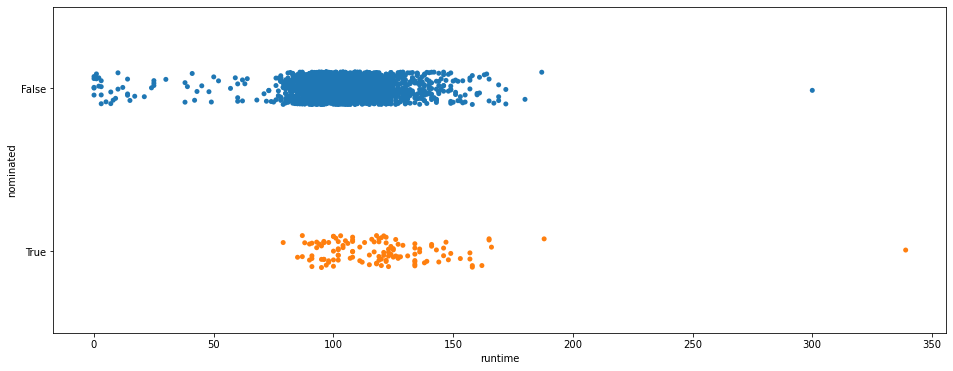

In [36]:
f = plt.figure(figsize=(16, 6))
sb.stripplot(x = 'runtime', y = 'nominated', data = df,orient='h')

There is 2 distinct groups of data. Hence, using runtime as a variable is suitable for classification of nominated films.  Films with a higher runtime also have a higher chance of being nominated.

# Nominated vs Popularity

<AxesSubplot:xlabel='popularity', ylabel='nominated'>

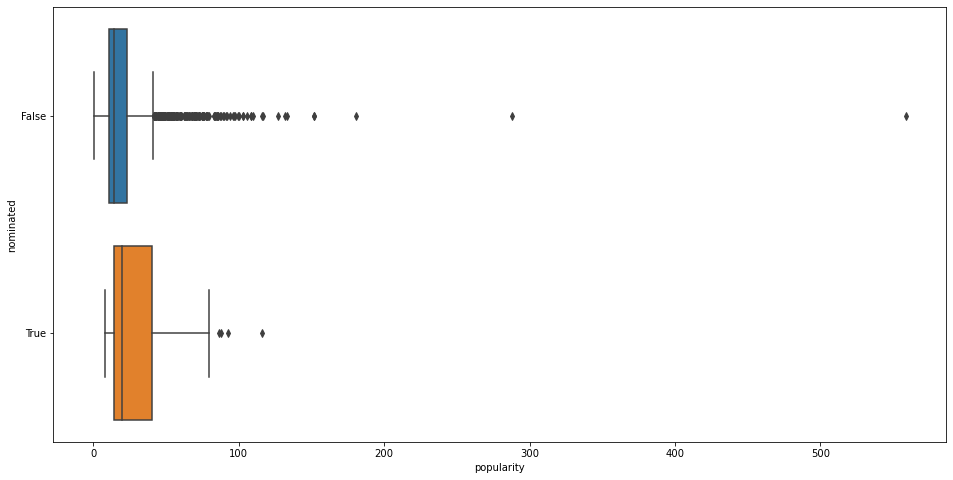

In [37]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = df["popularity"], y = df["nominated"], orient = "h",)

<AxesSubplot:xlabel='popularity', ylabel='nominated'>

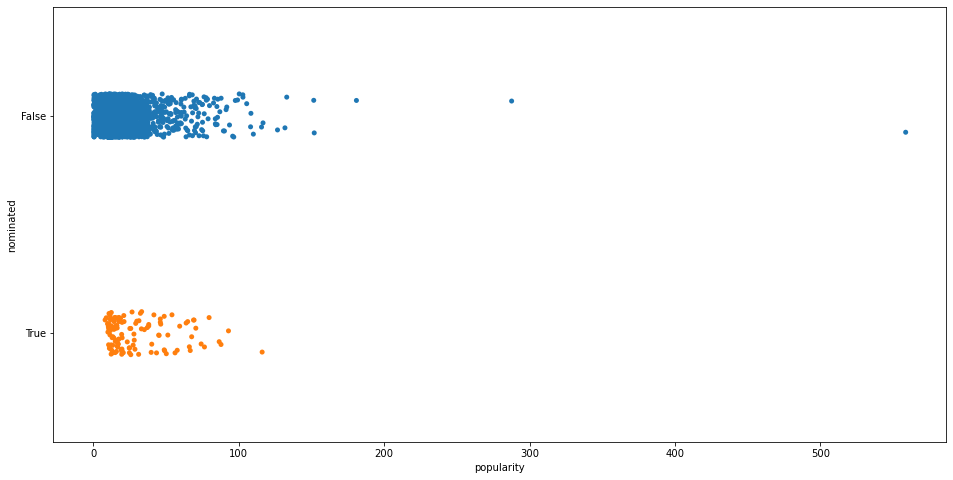

In [38]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'popularity', y = 'nominated', data = df, orient = 'h')

# Nominated vs Vote Average

<AxesSubplot:xlabel='vote_average', ylabel='nominated'>

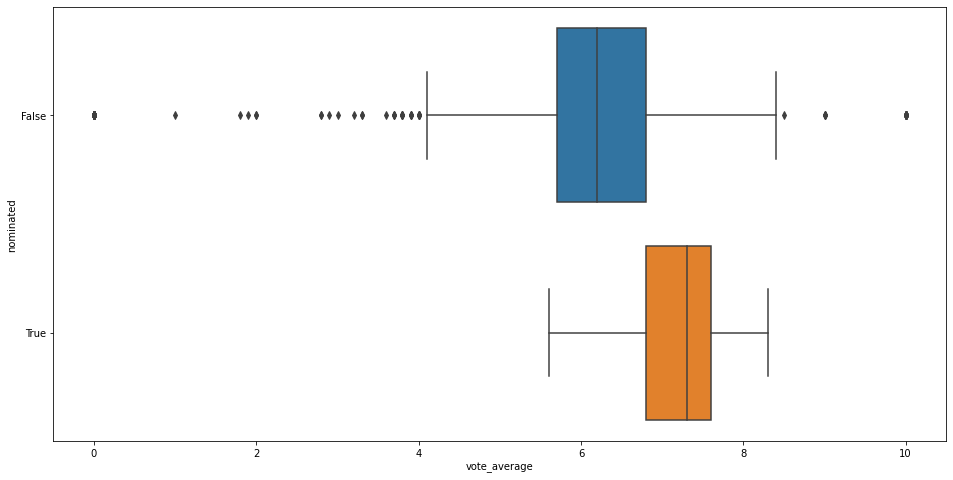

In [39]:
f = plt.figure(figsize=(16,8))
sb.boxplot(x = df['vote_average'], y = df['nominated'], orient = "h")

<AxesSubplot:xlabel='vote_average', ylabel='nominated'>

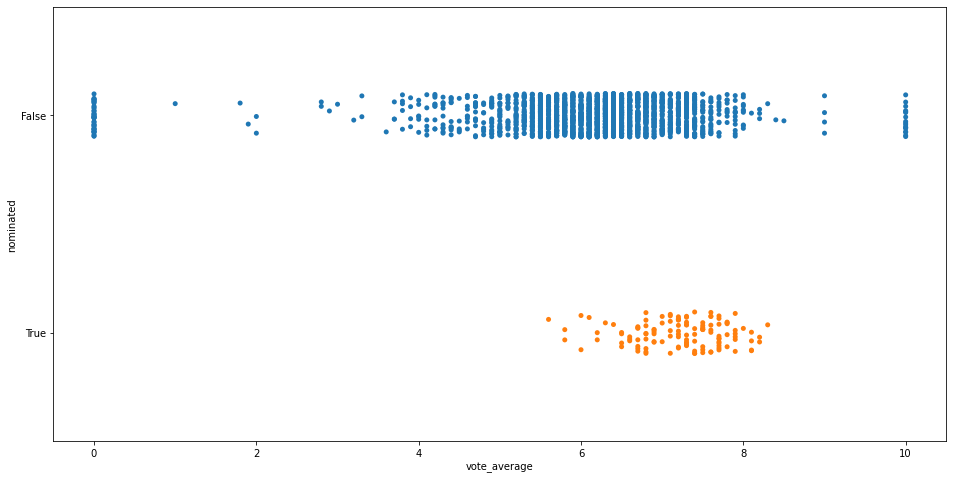

In [40]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'vote_average', y = 'nominated', data = df, orient = 'h')

# Nominated vs Release Month

<AxesSubplot:xlabel='month', ylabel='nominated'>

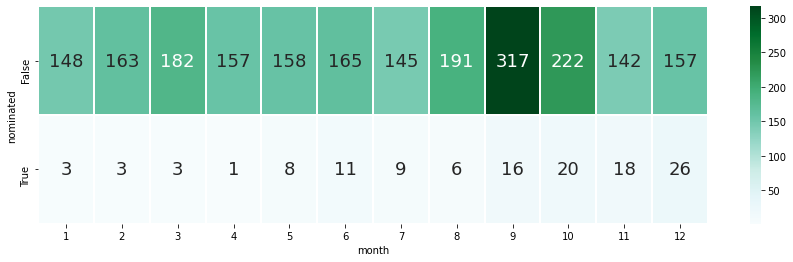

In [41]:
result = pd.concat([df,dateDF], axis=1)
result2 = result
f = plt.figure(figsize=(15, 4))
sb.heatmap(result.groupby(['nominated', 'month']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Complex Relationships with Nominated

# Nominated vs Budget & Runtime

<AxesSubplot:xlabel='budget', ylabel='runtime'>

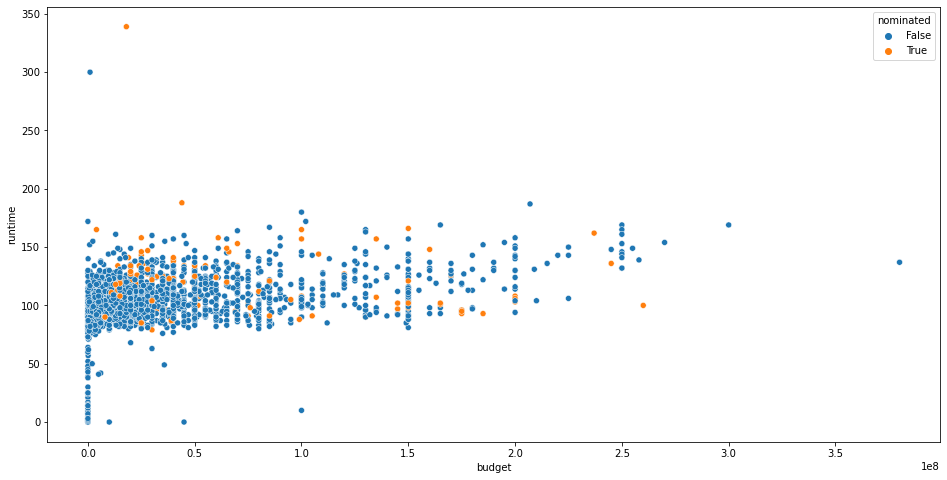

In [42]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'budget', y = 'runtime', hue = 'nominated', data = df)

# Nominated vs Budget & Revenue

<AxesSubplot:xlabel='budget', ylabel='revenue'>

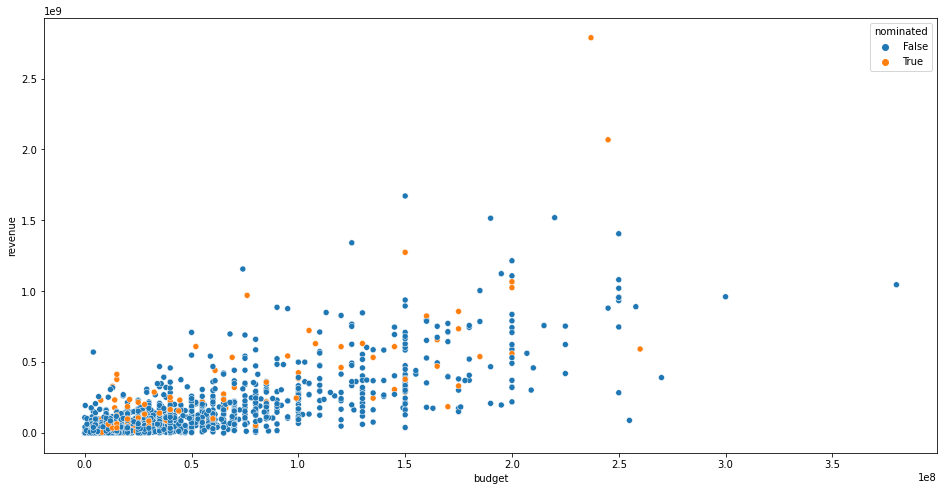

In [43]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'budget', y = 'revenue', hue = 'nominated', data = df)

# Decision tree

Since we are doing a Classification Problem, we have decided to use the decison tree Model to classify whether a movie will get nominated or not based on the variables below.

In [44]:
# scale down data frame to a smaller 
df = result[['original_title','runtime','budget','revenue','popularity','vote_average','nominated','month']]
df

,original_title,runtime,budget,revenue,popularity,vote_average,nominated,month
0,Legends: The Five Greatest Fighters from Pride...,140.0,100000,7000000,0.878,0.0,False,6
1,My Brother's War,115.0,40,300,0.600,0.0,False,9
2,Hank Williams First Nation,92.0,300000,166000,0.600,0.0,False,2
3,One More Round,90.0,350000,4984,1.793,6.5,False,2
4,Anonymous Celebrities: Animatic,99.0,200,10,1.181,10.0,False,10
...,...,...,...,...,...,...,...,...
2266,Star Wars: The Force Awakens,136.0,245000000,2068223624,56.282,7.4,True,12
2267,Inside Out,95.0,175000000,857611174,59.480,7.9,True,6
2268,Jurassic World,124.0,150000000,1671713208,83.357,6.6,False,6
2269,Avengers: Age of Ultron,141.0,250000000,1405403694,151.637,7.3,False,4


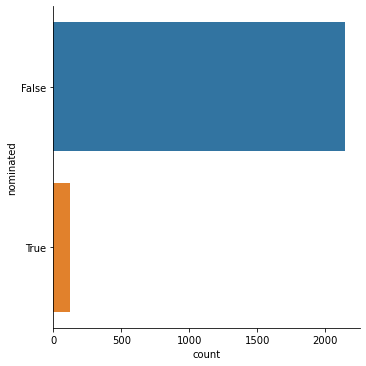

In [47]:
df['nominated'].value_counts()
sb.catplot(y = 'nominated', data = df, kind = "count")

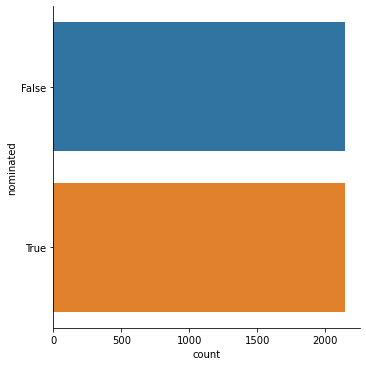

In [49]:
# Upsample nominated to match unnominated data to reduce biasness
from sklearn.utils import resample

not_nominated = df[df.nominated == False]
nominated = df[df.nominated == True]
# print(not_nominated)
# Upsample the nominated movies
nominated = resample(nominated, 
                        replace=True,                     # sample with replacement
                        n_samples=not_nominated.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
upsize_df = pd.concat([nominated, not_nominated])

# Check the ratio of the classes
upsize_df['nominated'].value_counts()
sb.catplot(y = 'nominated', data = upsize_df, kind = "count")

In [48]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

predictors = ['runtime','budget','revenue','popularity','vote_average','month']

# Extract Response and Predictors
y = pd.DataFrame(upsize_df['nominated'])
X = pd.DataFrame(upsize_df[predictors])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [49]:
X_train

,runtime,budget,revenue,popularity,vote_average,month
1975,95.0,1000000,1897363,9.414,6.9,5
1251,97.0,900000,25000,6.396,7.3,9
2186,92.0,74000000,311594032,47.133,6.0,1
178,127.0,28000000,121147947,31.481,8.1,9
189,157.0,150000000,895921036,131.849,7.8,11
...,...,...,...,...,...,...
961,123.0,40000000,129540499,10.147,6.7,8
2072,113.0,14000000,233555708,35.202,8.0,11
2030,165.0,4000000,44349000,13.418,7.5,6
580,123.0,30000000,131016624,16.306,7.7,9


In [3]:
results.dtypes()

NameError: name 'results' is not defined

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.826955074875208

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8378588052754073



<AxesSubplot:>

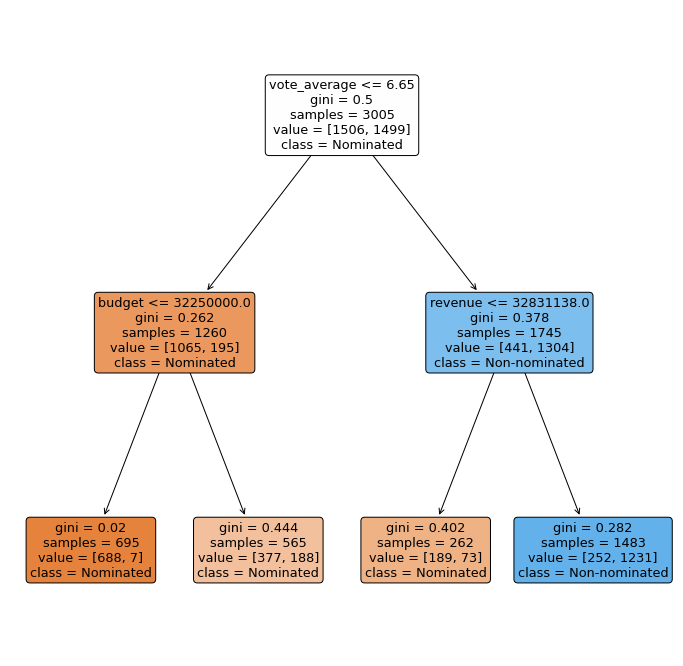

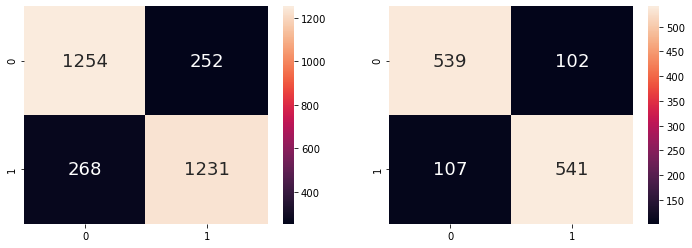

In [50]:
# Extract Response and Predictors
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train) 

# Plot the trained Decision Tree
from sklearn.tree import plot_tree# train the decision tree model
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Nominated", "Non-nominated"])

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

#Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

However, 1 set back of decision tree is that 

# Random Forest

We think that using random forest is more appropriate as random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.`

In [51]:
def random_forest(tree_size,x,y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = tree_size,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(x, y.nominated.ravel())
    
    y_pred = rforest.predict(x)

    # Print the Classification Accuracy
    print("Train Data")
    print("Accuracy  :\t", rforest.score(x, y))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y, y_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print()

    print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})



In [62]:
def random_forest2(tree_size,x,y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = tree_size,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(x, y.nominated.ravel())
    
    y_pred = rforest.predict(x)

    # Print the Classification Accuracy
    print("Test Data")
    print("Accuracy  :\t", rforest.score(x, y))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y, y_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Test :\t", (tnTrain/(tnTrain + fpTrain)))
    print()

    print("FPR Test :\t", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Test :\t", (fnTrain/(tpTrain + fnTrain)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Train Data
Accuracy  :	 0.8958402662229618

TPR Train :	 0.9613075383589059
TNR Train :	 0.8306772908366534

FPR Train :	 0.1693227091633466
FNR Train :	 0.038692461641094064
Test Data
Accuracy  :	 0.891388673390225

TPR Test :	 0.9475308641975309
TNR Test :	 0.8346333853354134

FPR Test :	 0.16536661466458658
FNR Test :	 0.05246913580246913


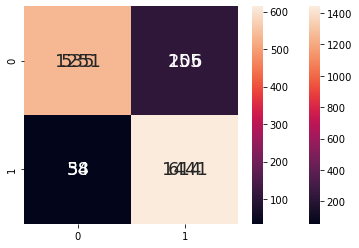

In [67]:
random_forest(100,X_train,y_train)


Test Data
Accuracy  :	 0.8937160589604345

TPR Test :	 0.941358024691358
TNR Test :	 0.8455538221528861

FPR Test :	 0.1544461778471139
FNR Test :	 0.05864197530864197


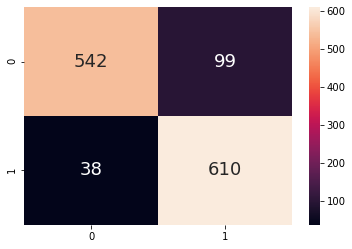

In [68]:
random_forest2(100,X_test,y_test)

# Testing with model with test data set

Test Data
Accuracy  :	 0.8937160589604345

TPR Test :	 0.941358024691358
TNR Test :	 0.8455538221528861

FPR Test :	 0.1544461778471139
FNR Test :	 0.05864197530864197


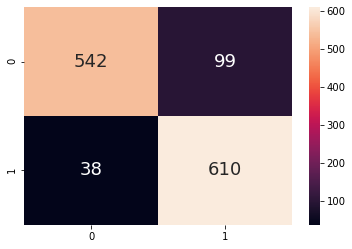

# Testing with higher number of trees

Train Data
Accuracy  :	 0.8941763727121465

TPR Train :	 0.9586390927284857
TNR Train :	 0.8300132802124834

FPR Train :	 0.1699867197875166
FNR Train :	 0.04136090727151434


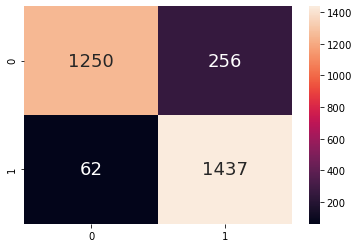

In [54]:
random_forest(1000,X_train,y_train)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

estimator_range = [1] + list(range(10,200,20))
scores = []

for estimator in estimator_range:
    rforest = RandomForestClassifier(n_estimators = estimator,  # n_estimators denote number of trees
                                 max_depth = 4)
    rforest.fit(X_train,y_train.nominated.ravel())
    scores.append(rforest.score(X_train,y_train.nominated.ravel()))

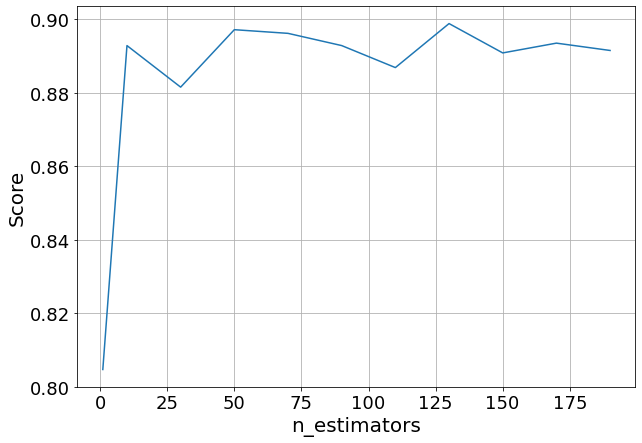

In [56]:
plt.figure(figsize = (10,7))
plt.plot(estimator_range,scores)

plt.xlabel('n_estimators',fontsize = 20)
plt.ylabel('Score',fontsize=20)
plt.tick_params(labelsize= 18)
plt.grid()

In [57]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
vote_average,0.413
revenue,0.221
budget,0.141
runtime,0.088
month,0.075
popularity,0.063


<AxesSubplot:xlabel='feature'>

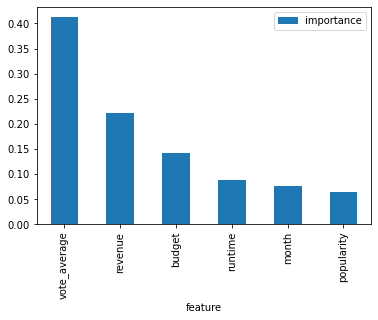

In [58]:
importances.plot.bar()

The increase of number of trees does not seem to improve our prediction accuracy, hence we believe that a random forest with 100 trees is sufficient

## We want to predict a few specific movies to test our model

In [59]:
# Extract movies for Prediction
movies = df[df["original_title"].isin(["Brokeback Mountain", "Avengers: Age of Ultron", "Inside Out"])]
movies

,original_title,runtime,budget,revenue,popularity,vote_average,nominated,month
176,Brokeback Mountain,134.0,14000000,178043761,17.736,7.8,True,9
2267,Inside Out,95.0,175000000,857611174,59.480,7.9,True,6
2269,Avengers: Age of Ultron,141.0,250000000,1405403694,151.637,7.3,False,4


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Extract Predictors for Prediction
X_pred = pd.DataFrame(movies[predictors])


rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                             max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.nominated.ravel())


# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)
y_pred

array([ True,  True, False])

In [61]:
# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)
np.set_printoptions(precision = 3)
print(y_prob)

[[0.128 0.872]
 [0.135 0.865]
 [0.569 0.431]]


# Conclusion 

We can say that our model is relatively accurate at predicting whether or not a movie will be nominated for an Oscars/Golden Globe award, based on the variables, runtime, budget, revenue, popularity, vote_average and month. This is supported by the data accuracy that we have obtained which is consistently greater than 85%. 

One interesting fnding is that 